# Products Recommandation by the Tompson Sampling-based AI engine

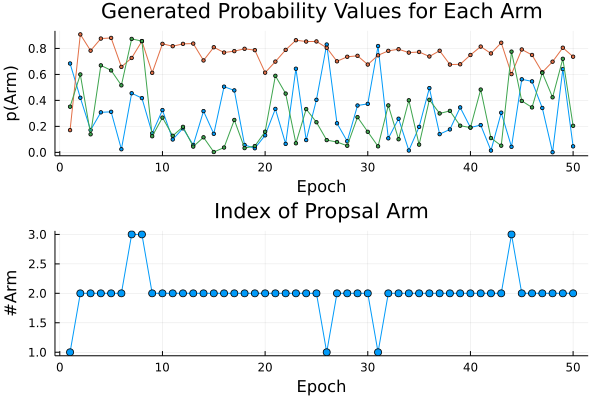

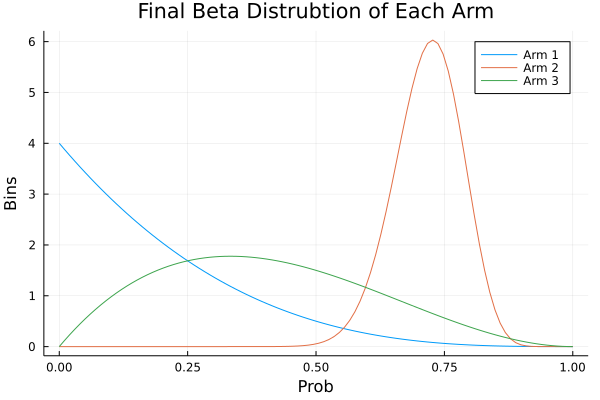

S is now given by
Int32[0, 32, 1]
F is now given by
Int32[3, 12, 2]


In [17]:
## Declare Packages tu Use 
using Distributions
using Formatting
using Plots

## Parameter Initialization
N = 3
means = [0.3, 0.7, 0.5]

## Online Training By Thompson Sampling
disp = false 
Nepoch = 50
proposal_arm_array = zeros(Nepoch)
probs_array = zeros(Nepoch, N)
S, F = zeros(Int32, N), zeros(Int32, N)
probs = zeros(N)
for epoch in range(1, Nepoch)
    probs = rand.(Beta.(S.+1,F.+1))
    proposal_arm = argmax(probs)
    if rand(Uniform()) < means[proposal_arm] 
        S[proposal_arm] += 1
    else
        F[proposal_arm] += 1
    end
    
    probs_array[epoch,:] = probs
    proposal_arm_array[epoch] = proposal_arm

    if disp
        println("Trial $(epoch)")
        for prob ∈ probs
            # println("prob: $(prob)")
            printfmt("prob: {:.2f} ", prob)
        end
        println(" => Max arm: $(proposal_arm)")
    end
end

# Results Illustration
p1 = plot(probs_array, marker = :circle, markersize = 2, 
    ylabel = "p(Arm)", 
    title = "Generated Probability Values for Each Arm", 
    label = ["Arm 1" "Arm 2" "Arm 3"])
p2 = plot(proposal_arm_array, marker = :circle, 
    ylabel = "#Arm", 
    title = "Index of Propsal Arm", legend = false)

h = plot(p1, p2, layout = (2,1),  xlabel= "Epoch", legend=false)
display(h)

lo, hi = 0., 1.
x = range(lo, hi; length = 100)
Y = []
for i in range(1,N)
    y = pdf.(Beta(S[i]+1,F[i]+1),x)
    if i == 1
        Y = y
    else
        Y = [Y y]
    end
end

h = plot(x, Y, xlabel = "Prob", ylabel = "Bins", 
    title = "Final Beta Distrubtion of Each Arm", 
    label = ["Arm 1" "Arm 2" "Arm 3"])
display(h)

println("S is now given by")
println(S)
println("F is now given by")
println(F)